In [1]:
import pymongo
from pymongo import MongoClient
from bson.objectid import ObjectId
import random
import pprint
import json
import urllib
import warnings
from pprint import pprint
import itertools
import pandas as pd
import numpy as np
import time
from faker import Faker
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
import datetime

In [270]:
def s_name(n=100, r_seed=100):
    Faker.seed(r_seed)
    faker = Faker()
    names = []
    for x in range(n):
        names.append('{}'.format(faker.name()))
    return names

def s_grade(n=100, shift=5, skewness=2, r_seed=100):
    np.random.seed(r_seed)
    rand = beta.rvs(shift, skewness, size=n) * 100  #Skewnorm function
    return rand

def s_dates(n=100, start='2020-01-01', end='2020-01-03', r_seed=100):
    np.random.seed(r_seed)
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    start_u = start.value//10**9
    end_u = end.value//10**9
    date_list = pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')
    string_dlist = [str(x) for x in list(date_list)]
    return date_list, string_dlist


def s_id(n=100, length=5, r_seed=100):
    random.seed(r_seed)
    ids = []
    for x in range(n):
        ids.append('ID'+ str(random.randint(10000, 99999)))
    return ids

def time_spent(n=100, r_seed=100):
    random.seed(r_seed)
    numbers = []
    for x in range(n):
        numbers.append(random.randint(0, 40))
    return numbers

In [295]:
def generate_data(num=30, start_time='2020-01-01', end_time='2020-01-01 23:59:59', due_date='2020-01-01 22:00:00', 
                  shift=10, skewness = 2, func_seed = 80, class_name='Chemistry'):

    ids = s_id(n=num, r_seed=func_seed)
    names = s_name(n=num, r_seed=func_seed)
    dates  = s_dates(n=num, start=start_time, end=end_time)
    timespent = time_spent(n=num, r_seed=func_seed)
    clean_grades = map(int, [x for x in s_grade(n=num, shift=shift, skewness=skewness, r_seed=func_seed)])
    
    data = pd.DataFrame(data={'ID':ids, 'Name':names, 'Score': clean_grades, 'Submission TimeStamp':dates[0], 'Time spent(minute)':timespent })
    data['Status'] = ['Late' if data['Submission TimeStamp'][t].value > pd.to_datetime(due_date).value else 'On Time' for t in range(len(data['Submission TimeStamp']))]
    data.loc[(data['Status'] == 'Late') & (data['Score'] <= 30), 'Status'] = 'Missing'
    data.loc[data['Status'] == 'Missing', ['Score', 'Submission TimeStamp', 'Time spent(minute)']] = 0
    data['Grade'] = ['A' if (100 >= x >=85)  else 'B' if (84>= x >=75) else 'C' if (74>= x >= 65) else 'D' if (64 >= x >= 40) else 'F' for x in data['Score']]
    data['Class'] = class_name
    return data 

In [343]:
assignment1 = generate_data(num=30, shift=5, skewness=2, func_seed=99)

student consistency i.e. probability of next grade, naive bayes


In [347]:
assignment1[assignment1['Grade'] == 'A']

,ID,Name,Score,Submission TimeStamp,Time spent(minute),Status,Grade,Class
4,ID33435,Claire Winters,92,2020-01-01 18:13:35,11,On Time,A,Chemistry
12,ID99693,Thomas Martin,89,2020-01-01 19:46:22,34,On Time,A,Chemistry
13,ID80599,Linda Mcgrath,94,2020-01-01 13:52:34,5,On Time,A,Chemistry
15,ID91778,John Weiss,91,2020-01-01 23:58:16,31,Late,A,Chemistry
17,ID36144,Aaron Rivera,89,2020-01-01 04:55:24,26,On Time,A,Chemistry
23,ID60870,Jennifer Davis,89,2020-01-01 23:25:54,13,Late,A,Chemistry
24,ID99439,Christopher Thompson,98,2020-01-01 19:48:43,9,On Time,A,Chemistry
28,ID96581,Dwayne Willis,88,2020-01-01 05:56:17,21,On Time,A,Chemistry


50.10152717019101

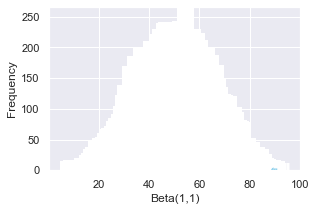

In [367]:
data_beta = beta.rvs(5, 5, size=10000) * 100
ax = sns.distplot(data_beta,
                  kde=False,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta(1,1)', ylabel='Frequency')
data_beta.mean()

In [ ]:
def randomizer(num, 'high', 'medium', 'low'):
    quiz_dict = {}
    low = [10, 2]
    medium = [5, 2]
    high = [5, 5]
    generate_data(num=num, shift=5, skewness=2, func_seed=99)
    return quiz_dict